In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    orig_df = pd.read_csv("BRFSS_2020_DATA.csv", low_memory=False)
except:
    orig_df = pd.read_csv("../BRFSS_2020_DATA.csv", low_memory=False)

# Cleaning:

#### To preserve most of the rows, we'll remove all columns with threshhold(must have at least 300k not nulls): 

In [3]:
clean_df_1 = orig_df.dropna(axis=1, thresh=300000)
clean_df_1.shape

(401958, 112)

#### Remove rows with nulls:

In [4]:
clean_df_1 = clean_df_1.dropna()
clean_df_1.shape

(326959, 112)

In [5]:
clean_df_1.columns.to_list()

['STATE FIPS CODE',
 'FILE MONTH',
 'INTERVIEW DATE',
 'INTERVIEW MONTH',
 'INTERVIEW DAY',
 'INTERVIEW YEAR',
 'FINAL DISPOSITION',
 'ANNUAL SEQUENCE NUMBER',
 'PRIMARY SAMPLING UNIT',
 'SEX OF RESPONDENT',
 'GENERAL HEALTH',
 'NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD',
 'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',
 'HAVE ANY HEALTH CARE COVERAGE',
 'MULTIPLE HEALTH CARE PROFESSIONALS',
 'COULD NOT SEE DR. BECAUSE OF COST',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'HOW MUCH TIME DO YOU SLEEP',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE',
 'EVER DIAGNOSED WITH A STROKE',
 'EVER TOLD HAD ASTHMA',
 '(EVER TOLD) YOU HAD SKIN CANCER?',
 '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',
 '(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',
 'EVER TOLD YOU HAVE KIDNEY DISEASE?',
 '(EVER TOLD) YOU 

# EDA

In [6]:
corr__ = clean_df_1.corr()
corr__['(EVER TOLD) YOU HAD DIABETES'].abs().sort_values(ascending=False).head(50)

(EVER TOLD) YOU HAD DIABETES                                                                             1.000000
GENERAL HEALTH                                                                                           0.243403
IMPUTED AGE IN SIX GROUPS                                                                                0.185661
COMPUTED BODY MASS INDEX                                                                                 0.185643
IMPUTED AGE VALUE COLLAPSED ABOVE 80                                                                     0.184805
REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE                                             0.179350
COMPUTED BODY MASS INDEX CATEGORIES                                                                      0.167855
RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)    0.167778
EMPLOYMENT STATUS                                                                       

# HEATMAP

In [7]:
# del hm_df

In [8]:
correlations = corr__['(EVER TOLD) YOU HAD DIABETES'].abs()
correlations = correlations[correlations>0.1].index.to_list()

In [9]:
hm_df = clean_df_1[correlations]

In [10]:
# Dataset for heatmap; exclude age group 14='No response'
hm_df = hm_df[hm_df['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE'] < 14].sort_values('REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE', ascending=True)
hm_df.shape

(323558, 25)

In [11]:
hm_df.columns.to_list()

['GENERAL HEALTH',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD DIABETES',
 'NUMBER OF PERMANENT TEETH REMOVED',
 'EMPLOYMENT STATUS',
 'DIFFICULTY WALKING OR CLIMBING STAIRS',
 'DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',
 'PNEUMONIA SHOT EVER',
 'ADULTS WITH GOOD OR BETTER HEALTH',
 'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE',
 'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
 'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)',
 'RESPONDENTS DIAGNOSED WITH ARTHRITIS',
 'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE',
 'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
 'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
 'IMPUTED AGE IN SIX GROUPS',
 'COMPUTED WEIGHT IN KILOGRAMS',
 'COMPUTED BODY MASS INDEX',
 'COMPUTED BODY MASS INDEX CATEGORIES',
 'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
 'DRINKING AN

In [12]:
columns_to_remove = [
'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
'EVER DIAGNOSED WITH HEART ATTACK',
'NUMBER OF PERMANENT TEETH REMOVED',
'PNEUMONIA SHOT EVER', 
'ADULTS WITH GOOD OR BETTER HEALTH',
'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
'IMPUTED AGE IN SIX GROUPS',
# 'COMPUTED BODY MASS INDEX CATEGORIES',
'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
'DRINKING AND DRIVING'
]

hm_df.drop(columns_to_remove, axis=1, inplace=True)

In [13]:
# rename long column names
# -------------------------
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
hm_df.rename(columns={'EVER DIAGNOSED WITH HEART ATTACK': 'DIAGNOSED WITH HEART ATTACK'
                      ,'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE': 'DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE'
                      ,'EVER DIAGNOSED WITH A STROKE': 'DIAGNOSED WITH A STROKE'
                      ,'(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?' : '(TOLD) YOU HAD COPD, EMPHYSEMA OR CHRONIC BRONCHITIS?'
                      ,'(EVER TOLD) YOU HAD DIABETES' : '(TOLD) YOU HAD DIABETES'
                      ,'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE' : 'LEISURE TIME PHYSICAL ACTIVITY'
                      ,'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)' : 'REPORTED CHD OR MI'
                      ,'RESPONDENTS DIAGNOSED WITH ARTHRITIS' : 'DIAGNOSED WITH ARTHRITIS'
                      ,'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE' : 'AGE IN FIVE-YEAR AGE'
                      ,'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE' : 'AGE IN TWO AGE GROUPS'
                      ,'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE' : 'HEALTH CARE COVERAGE'}
                      , inplace=True)

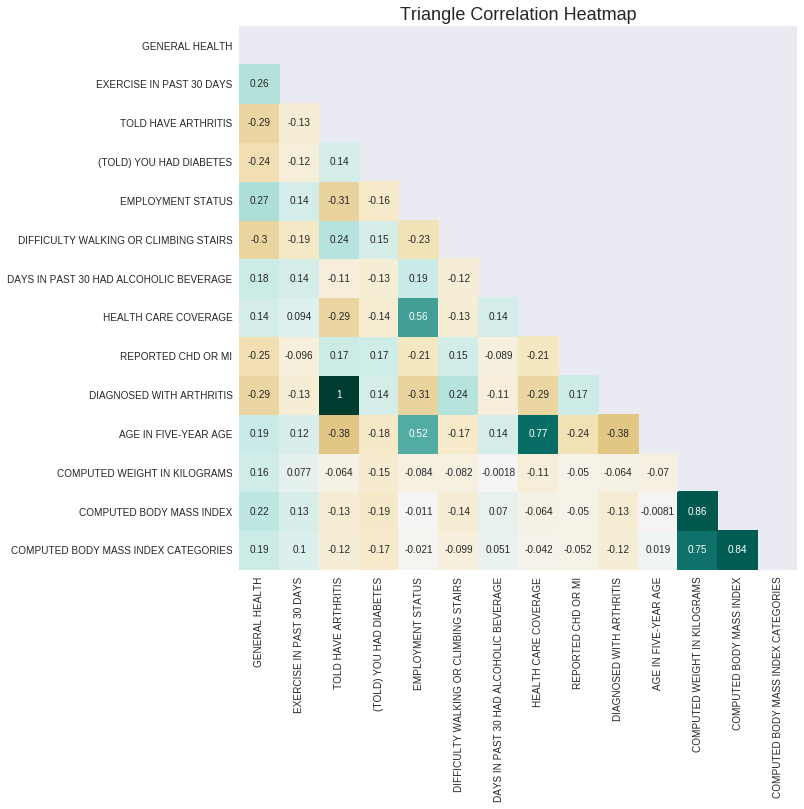

In [14]:
plt.figure(figsize=(10, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(hm_df.corr(), dtype=bool))
heatmap = sns.heatmap(hm_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', cbar=False)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18});

# PIE CHART

In [15]:
# Dataset for heatmap; exclude age group 14='No response'
pie_df = clean_df_1[clean_df_1['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE'] < 14].sort_values('REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE', ascending=True)
pie_df = clean_df_1['SEX OF RESPONDENT']
pie_df.shape

(326959,)

In [16]:
pie_df.value_counts()

2    171733
1    155226
Name: SEX OF RESPONDENT, dtype: int64

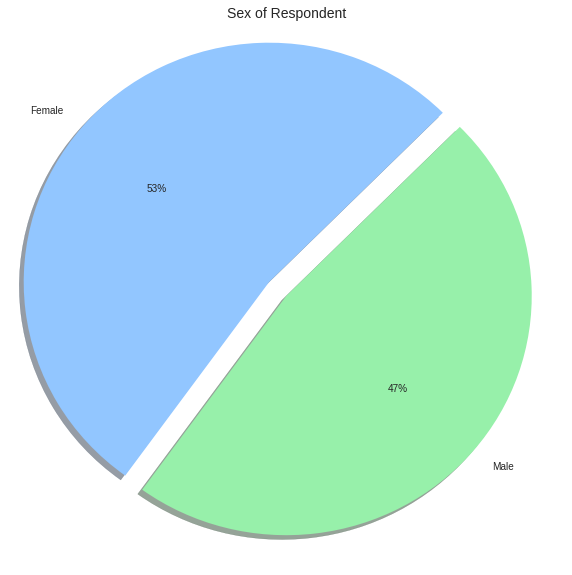

In [17]:
#define data labels
labels = ['Female', 'Male']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10, 10))
plt.pie(pie_df.value_counts(), labels = labels, colors = colors, autopct='%.0f%%' ,radius=1.1 ,shadow=True, explode=[0.1,0], startangle=45)
plt.title("Sex of Respondent", fontdict={'fontsize':14})
plt.show()

# HISTOGRAMS

In [18]:
# COMPUTED BODY MASS INDEX CATEGORIES
# COMPUTED BODY MASS INDEX 

hs_df = clean_df_1.drop(columns_to_remove, axis=1)
hs_df.dropna(inplace=True)

In [19]:
hs_df = hs_df[hs_df['COMPUTED BODY MASS INDEX']<6000]

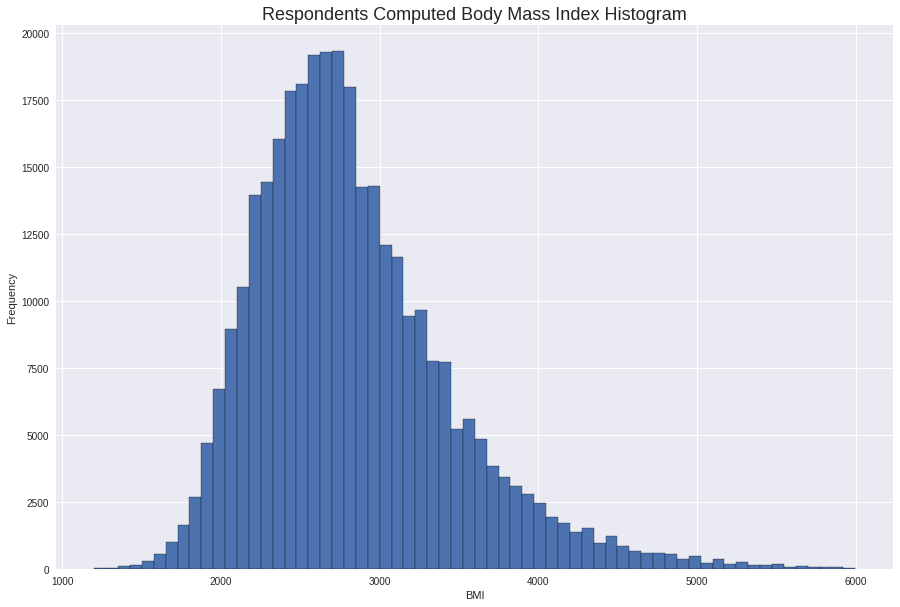

In [20]:
counts, bins = np.histogram(hs_df['COMPUTED BODY MASS INDEX'], bins=64)
plt.figure(figsize=(15, 10))
plt.hist(bins[:-1], bins, weights=counts, ec='black')
plt.title('Respondents Computed Body Mass Index Histogram', fontdict={'fontsize':18})
plt.ylabel('Frequency')
plt.xlabel('BMI')
plt.show()

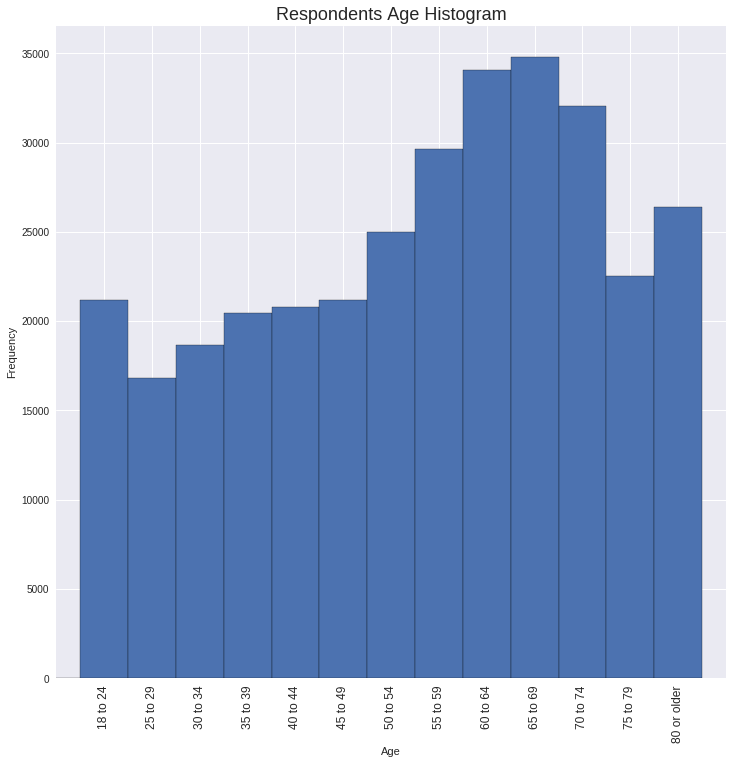

In [151]:
hs_df_age = clean_df_1.drop(columns_to_remove, axis=1)
hs_df_age.dropna(inplace=True)
hs_df_age = hs_df_age[hs_df_age['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE']!=14]
age_map = {
1: '18 to 24',
2: '25 to 29',
3: '30 to 34',
4: '35 to 39',
5: '40 to 44',
6: '45 to 49',
7: '50 to 54',
8: '55 to 59',
9: '60 to 64',
10: '65 to 69',
11: '70 to 74',
12: '75 to 79',
13: '80 or older'
}
hs_df_age['age_str'] = hs_df_age['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE'].map(age_map)

plt.figure(figsize=(12, 12))
plt.hist(x=hs_df_age['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE'], bins=np.arange(15) - 0.5, ec='black', align='mid')
plt.title('Respondents Age Histogram', fontdict={'fontsize':18})
plt.ylabel('Frequency')
plt.xlabel('Age')
labels=list(age_map.values())

plt.xticks(range(1,14), labels, rotation=90, fontsize=12)
plt.xlim(0, 14)
plt.show()


In [145]:
labels

['18 to 24',
 '25 to 29',
 '30 to 34',
 '35 to 39',
 '40 to 44',
 '45 to 49',
 '50 to 54',
 '55 to 59',
 '60 to 64',
 '65 to 69',
 '70 to 74',
 '75 to 79',
 '80 or older']